# TSF GRIP (BATCH NOVEMBER 2021)
### Task 3: Iris Classification using clustering algorithm
Note: This notebook is for the task 2 of the TSF GRIP Internship.

**writer : HRISIKESH NEOGI**
### ABOUT THE DATA:
**IRIS DATA SET:**
The iris data set is a classic and very easy dataset to handle. It consists of 3 different types of iris flowers (Setosa, Versicolour, and Virginica) and their sepal and petal measurements.

**COLUMNS:**
- Sepal Length: the length of the sepals
- Sepal Width: the width of the sepals
- Petal Length: the length of the petal
- Petal Width: the width of the petal 

### TARGET: The target is the type of iris flower.
### **PROJECT DESCRIPTION:**

The project is to build CLUSTERS  OF THE DATA SET.

**APPROACH:**
The project will be divided into 3 parts:

**Data Preprocessing:**
Model Building
Model Evaluation
READING THE DATA:
The data set is read using pandas. The data is stored in a data frame called df.

### IMPORTING THE LIBRARIES:

In [1]:
#importing libraries to read the dataset 

import pandas as pd
iris = pd.read_csv('iris.csv')

In [2]:
#checking the data 
iris.head ()


,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [3]:
#checking the shape of the dataframe
iris.shape


(150, 6)

In [4]:
#checking the data types
iris.dtypes

Id                 int64
SepalLengthCm    float64
SepalWidthCm     float64
PetalLengthCm    float64
PetalWidthCm     float64
Species           object
dtype: object

So,
we have our feature columns(excluding the id column) and the target column. 

The feature columns are float, where Species , the target column is object.

**So, we can see we have 150 rows and 4 columns in the iris dataset.**

### Data Cleaning:

In [5]:
#let's drop the id column
iris.drop('Id', axis=1, inplace=True)

In [6]:
#checking the null values
iris.isnull().sum()

SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

**Looks like there is no null values in the iris dataset. So we can move forward with the data cleaning.**

In [7]:
#checking the statistical summary
iris.describe()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


## visualizing the data:

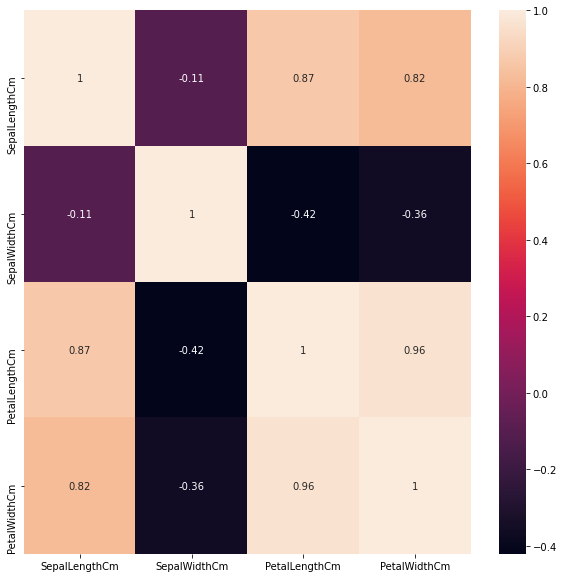

In [8]:
#visualizing the data
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(10,10))
sns.heatmap(iris.corr(), annot=True)
plt.show()


### from the corrrelaation plot we can see that 
- the petal length and petal width are highly correlated.
- The sepal length and sepal width are highly correlated.
- The sepal length and petal length are highly correlated.
- The sepal width and petal width are highly correlated.


# let's create clusters

# let's drop the target column

In [26]:
features = iris.iloc[:,:4]

In [27]:
#importing k-means
from sklearn.cluster import KMeans

In [28]:
wcss = []
for i in range (1,15):
    kmean = KMeans(n_clusters=i, init='k-means++', random_state=30)
    kmean.fit(features)
    wcss.append(kmean.inertia_)

C:\Users\neogi\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:881: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


In [29]:
wcss

[680.8243999999996,
 152.36870647733915,
 78.94084142614601,
 57.317873214285726,
 46.535582051282034,
 38.94595367106238,
 34.19698216257429,
 30.036595571095578,
 27.919951528863308,
 26.073676911323982,
 24.293079278564587,
 22.96670653005405,
 21.87357326007326,
 20.22298793853205]

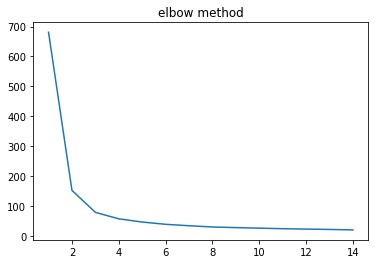

In [52]:
plt.title("elbow method")
plt.plot(range(1,15), wcss)

In [48]:
kmean_cls = KMeans(n_clusters=3,init='k-means++', random_state=30)

In [32]:
features['cluster number'] = kmean_cls.fit_predict(features)

In [33]:
features

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,cluster number
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,1
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2


### let's  visualize the clusters

In [41]:
x = iris.iloc[:, [0, 1, 2, 3]].values


In [42]:
y_kmeans = kmean_cls.fit_predict(x)

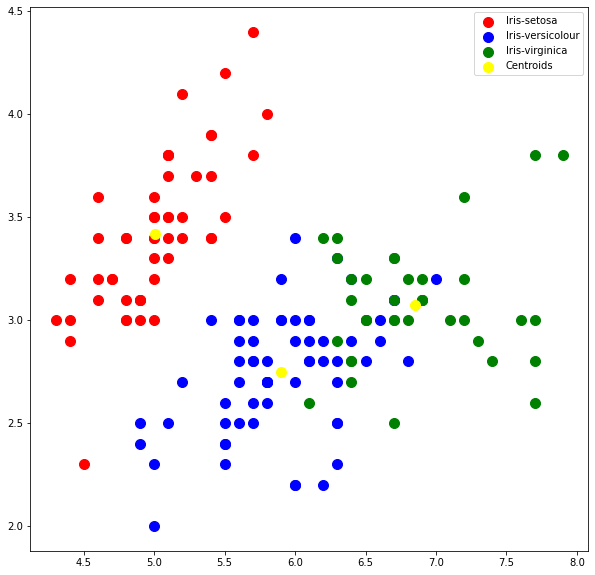

In [47]:
# Visualising the clusters - On the first two columns
plt.figure(figsize=(10,10))
plt.scatter(x[y_kmeans == 0, 0], x[y_kmeans == 0, 1], 
            s = 100, c = 'red', label = 'Iris-setosa')
plt.scatter(x[y_kmeans == 1, 0], x[y_kmeans == 1, 1], 
            s = 100, c = 'blue', label = 'Iris-versicolour')
plt.scatter(x[y_kmeans == 2, 0], x[y_kmeans == 2, 1],
            s = 100, c = 'green', label = 'Iris-virginica')

# Plotting the centroids of the clusters
plt.scatter(kmean_cls.cluster_centers_[:, 0], kmean_cls.cluster_centers_[:,1], 
            s = 100, c = 'yellow', label = 'Centroids')

plt.legend()

## from the above plot, we can clearly see the clusters.